In [ ]:
!pip install opencv-contrib-python

  Using cached opencv_contrib_python-4.7.0.72-cp37-abi3-win_amd64.whl (44.9 MB)


In [129]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image

In [ ]:
# RGB (Red Green Blue) - matplotlib
# BGR (Blue Green Red) - OpenCV

# Reading, Writing and displaying images by using CV2

In [147]:
image = cv2.imread('Bird.jpg')
print(type(image))

<class 'numpy.ndarray'>


In [148]:
print(image.shape)

(408, 612, 3)


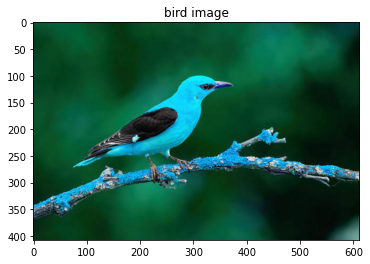

In [149]:
# matplotlib expects in RGB
plt.imshow(image)
plt.title("bird image")
plt.show()

In [135]:
# Converting RGB image into grayscale image

In [45]:
grayscale_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Save or display the resulting image
cv2.imwrite("grayscale_image.jpg", grayscale_img)
cv2.imshow("Grayscale Image", grayscale_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

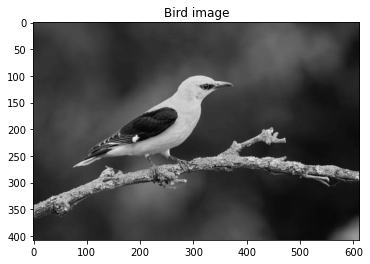

In [47]:
plt.imshow(grayscale_img,cmap='gray')
plt.title("Bird image")
plt.show()

In [150]:
# Extracting and showing individual channels
(B, G, R) = cv2.split(image)

In [151]:
rgb_img = cv2.merge([R, G, B])

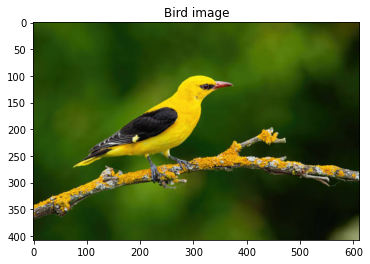

In [152]:
plt.imshow(rgb_img)
plt.title("Bird image")
plt.show()

# Resize the image

In [37]:
img_resize = cv2.resize(rgb_img, (256,256))
cv2.imshow('bird image', img_resize)
cv2.waitKey(0)
cv2.destroyAllWindows()

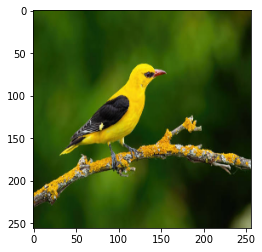

In [38]:
plt.imshow(img_resize)

In [39]:
img_resize.shape

(256, 256, 3)

In [70]:
img_resize = cv2.resize(rgb_img, (rgb_img.shape[1]//3, rgb_img.shape[0]//3)) #another way to resize

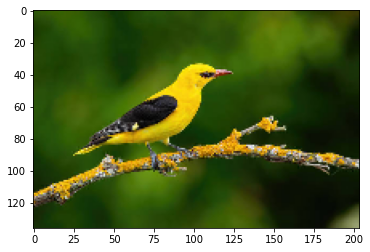

In [71]:
plt.imshow(img_resize)

# Flip the image
#### 0, 1 and -1

In [163]:
img_flip = cv2.flip(rgb_img, 0)

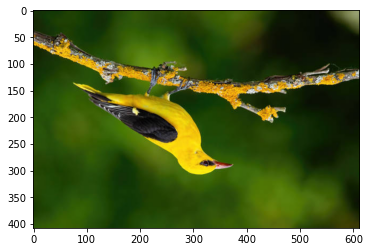

In [164]:
plt.imshow(img_flip)
plt.show()

In [183]:
img_flip = cv2.flip(rgb_img, 1)

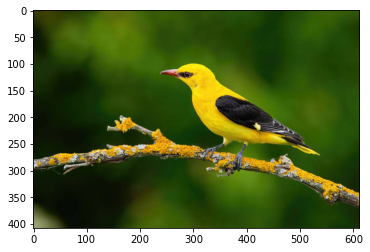

In [184]:
plt.imshow(img_flip)
plt.show()

In [173]:
img_flip = cv2.flip(rgb_img, -1)

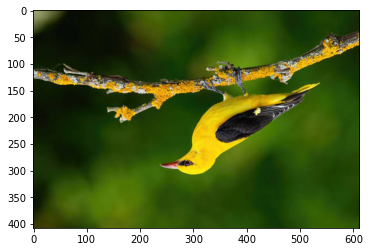

In [174]:
plt.imshow(img_flip)

# Averaging Filter/Mean Filter/Box Filter
- It is a linear filter which replaces eachh pixel values by average of all neighbouring pixel values.
- Mean filters are often used in smoothing operation.
- It reduces noise and smoothes the image.

In [82]:
blur1 = cv2.blur(rgb_img, (5,5))
blur2 = cv2.blur(rgb_img, (15,15))
blur3 = cv2.blur(rgb_img, (35,35))

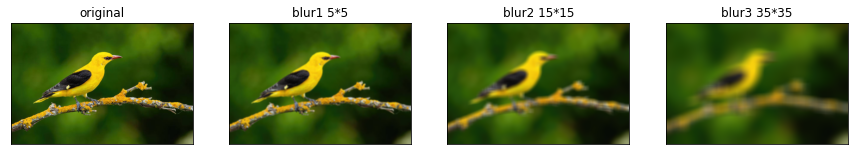

In [83]:
plt.figure(figsize=(15,10))
plt.subplot(141), plt.imshow(rgb_img), plt.title('original')
plt.xticks([]), plt.yticks([])

plt.subplot(142), plt.imshow(blur1), plt.title('blur1 5*5')
plt.xticks([]), plt.yticks([])

plt.subplot(143), plt.imshow(blur2), plt.title('blur2 15*15')
plt.xticks([]), plt.yticks([])

plt.subplot(144), plt.imshow(blur3), plt.title('blur3 35*35')
plt.xticks([]), plt.yticks([])

plt.show()


# Gaussian Blur
- It is a low pass filter which is used for noise reduction and smoothing.
- Gaussian filters are linear filters that are created as matrices and passed through each pixel of the 
selected portion of an image. 
- They work similarly to mean filters while representing average weight uniformly.

In [84]:
# GaussianBlur - Average filter (kernel size)
blur1 = cv2.GaussianBlur(rgb_img, (5,5), 0)
blur2 = cv2.GaussianBlur(rgb_img, (15,15), 0)
blur3 = cv2.GaussianBlur(rgb_img, (35,35), 0)

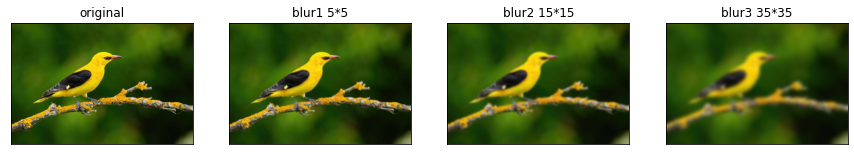

In [85]:
plt.figure(figsize=(15,10))
plt.subplot(141), plt.imshow(rgb_img), plt.title('original')
plt.xticks([]), plt.yticks([])

plt.subplot(142), plt.imshow(blur1), plt.title('blur1 5*5')
plt.xticks([]), plt.yticks([])

plt.subplot(143), plt.imshow(blur2), plt.title('blur2 15*15')
plt.xticks([]), plt.yticks([])

plt.subplot(144), plt.imshow(blur3), plt.title('blur3 35*35')
plt.xticks([]), plt.yticks([])

plt.show()


# Median Filter
- In a median filter, each output sample is computed as the median value of the input samples under the window. 
- The result is the middle value after the input values have been sorted
- It is a non-linear digital filter used in digital image processing and is efficient in preserving edges while removing noise.
- It acts as an important pre-processing step before applying edge detection techniques.

In [88]:
# ksize is kernel size 
blur1 = cv2.medianBlur(rgb_img, ksize=5)
blur2 = cv2.medianBlur(rgb_img, ksize=15)
blur3 = cv2.medianBlur(rgb_img, ksize=35)

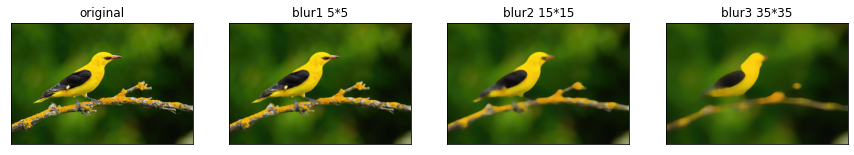

In [89]:
plt.figure(figsize=(15,10))
plt.subplot(141), plt.imshow(rgb_img), plt.title('original')
plt.xticks([]), plt.yticks([])

plt.subplot(142), plt.imshow(blur1), plt.title('blur1 5*5')
plt.xticks([]), plt.yticks([])

plt.subplot(143), plt.imshow(blur2), plt.title('blur2 15*15')
plt.xticks([]), plt.yticks([])

plt.subplot(144), plt.imshow(blur3), plt.title('blur3 35*35')
plt.xticks([]), plt.yticks([])

plt.show()


In [117]:
img1 = cv2.imread('grayscale.jpg')
cv2.imshow("Bird", img1)
cv2.waitKey()
cv2.destroyAllWindows()

In [118]:
def viewImage(image, name_of_window):
    cv2.namedWindow(name_of_window, cv2.WINDOW_NORMAL)
    cv2.imshow(name_of_window, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [119]:
viewImage(img1, 'Sample Image')

In [124]:
img1.size

749088

# Cropping of image

In [131]:
cropped = img1[36:600, 200:800]
viewImage(cropped, 'Sample Image')

In [132]:
# Interactively cropping the picture

Cropped image saved.


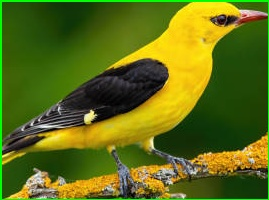

KeyboardInterrupt: 

In [130]:
# Global variables to store the coordinates of the region
drawing = False
ix, iy = -1, -1
ex, ey = -1, -1

# Mouse callback function
def draw_rectangle(event, x, y, flags, param):
    global ix, iy, ex, ey, drawing

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        ex, ey = x, y
        cv2.rectangle(img, (ix, iy), (ex, ey), (0, 255, 0), 2)
        cv2.imshow('image', img)

# Load the image
img = cv2.imread('Bird.jpg')
cv2.imshow('image', img)

# Set the callback function for mouse events
cv2.setMouseCallback('image', draw_rectangle)

while True:
    key = cv2.waitKey(1) & 0xFF

    # Press 'c' to crop the selected region
    if key == ord('c'):
        cropped_img = img[iy:ey, ix:ex]
        cv2.imshow('Cropped Image', cropped_img)

        # Save the cropped image to a file
        cv2.imwrite('cropped_image.jpg', cropped_img)
        print('Cropped image saved.')

        # Display the cropped image in Jupyter Notebook
        display(Image(filename='cropped_image.jpg'))

    # Press 'q' to exit
    elif key == ord('q'):
        break

cv2.destroyAllWindows()


# Rotating

In [134]:
(h, w, d) = img1.shape
center = (w//2, h//2)
M = cv2.getRotationMatrix2D(center,1000, 1.0)
rotated = cv2.warpAffine(img1, M, (w, h))
viewImage(rotated, 'Sample Image')